In [15]:
#загружаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2
%matplotlib inline

In [39]:
#взяла распределение хи-квадрат
#его параметром является степень свободы, взяла значение 2
#задаем случайную величину
df = 2
chi2_rv = chi2(df)
m, v = chi2_rv.stats()
print('mean = %s, variance = %s' % (m, v))

mean = 2.0, variance = 4.0


In [47]:
#генерируем выборку объёма 1000
sample = chi2.rvs(df, size = 1000)

Text(0.5, 0, '$x$')

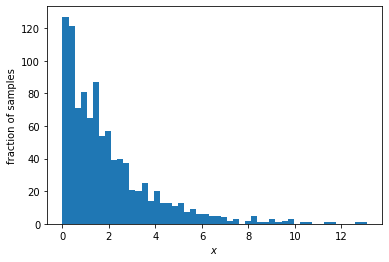

In [84]:
#строим гистограмму по выборке
plt.hist(sample, bins = 50)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

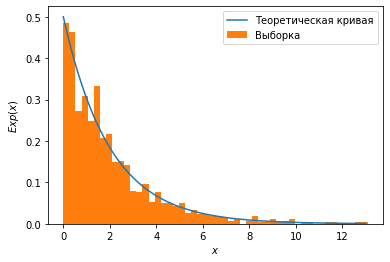

In [99]:
# строим ожидаемое теоретические распределение, рисуем вместе
x = np.linspace(0,13,100)
pdf = chi2_rv.pdf(x)
plt.plot(x, pdf, label = 'Теоретическая кривая')
plt.hist(sample, density = True, label = 'Выборка', bins = 50)
plt.legend()
plt.ylabel('$Exp(x)$')
plt.xlabel('$x$')

In [56]:
#находим среднее по выборкам из 5 элементов
sample_5 = [np.mean(chi2.rvs(df, size=5)) for i in np.arange(1, 1000)]

In [97]:
#находим среднее по выборкам из 10 элементов
sample_10 = [np.mean(chi2.rvs(df, size=10)) for i in np.arange(1, 1000)]

In [58]:
#находим среднее по выборкам из 50 элементов
sample_50 = [np.mean(chi2.rvs(df, size=50)) for i in np.arange(1, 1000)]

In [110]:
#Оцениваем распределение выборочного среднего случайной величины при разных выборках.
#Находим параметры нормального распределения для выборки n=5
mu = m
sigma = np.sqrt(v/5)
norm_5 = sts.norm(loc=mu, scale=sigma)

In [119]:
#Находим параметры нормального распределения для выборки n=10
mu = m
sigma = np.sqrt(v/10)
norm_10 = sts.norm(loc=mu, scale=sigma)
print("mu =", mu, ", sigma =", sigma)

mu = 2.0 , sigma = 0.6324555320336759


In [120]:
#Находим параметры нормального распределения для выборки n=50
mu = m
sigma = np.sqrt(v/50)
norm_50 = sts.norm(loc=mu, scale=sigma)
print("mu =", mu, ", sigma =", sigma)

mu = 2.0 , sigma = 0.282842712474619


In [121]:
#Находим плотности соответствующего нормального распределения для всех выборок
x = np.linspace(0,8,100)
pdf_5 = norm_5.pdf(x)
pdf_10 = norm_10.pdf(x)
pdf_50 = norm_50.pdf(x)
print("mu =", mu, ", sigma =", sigma)

mu = 2.0 , sigma = 0.282842712474619


Text(0.5, 0, '$x$')

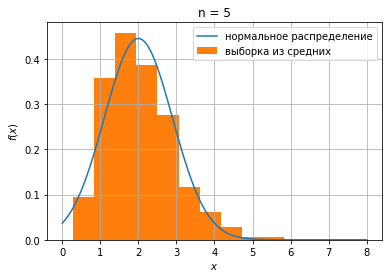

In [122]:
#Рисуем гистограммы вместе с плотностью соответствующего нормального распределения
plt.plot(x, pdf_5, label = 'нормальное распределение')
plt.hist(sample_5, density = True, label = 'выборка из средних')
plt.legend()
plt.title('n = 5')
plt.grid(True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

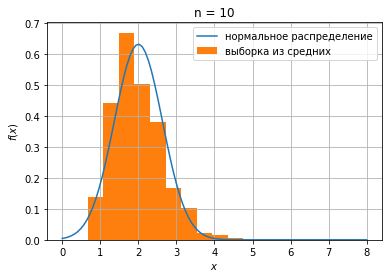

In [123]:
#Рисуем гистограммы вместе с плотностью соответствующего нормального распределения
plt.plot(x, pdf_10, label = 'нормальное распределение')
plt.hist(sample_10, density = True, label = 'выборка из средних')
plt.legend()
plt.title('n = 10')
plt.grid(True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

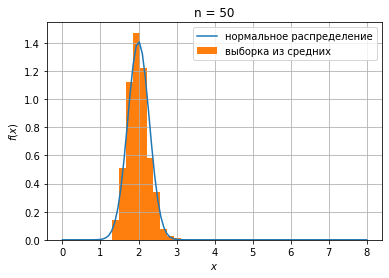

In [124]:
#Рисуем гистограммы вместе с плотностью соответствующего нормального распределения
plt.plot(x, pdf_50, label = 'нормальное распределение')
plt.hist(sample_50, density = True, label = 'выборка из средних')
plt.legend()
plt.title('n = 50')
plt.grid(True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Выводы:
    С ростом объема выборки - n, распределение средних значений начинает начинает быстрее сходиться к нормальному распределению
    